# DACON 해외 축구 선수 이적료 예측
## Classification - Random Forest
### 데이터 셋
[DACON](https://dacon.io/competitions/open/235538/data)  

### 사용 라이브러리

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
import glob

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

### Data Load

In [3]:
path = glob.glob("data/*")
path

['data\\FIFA_test.csv',
 'data\\FIFA_train.csv',
 'data\\pre_test.csv',
 'data\\pre_train.csv',
 'data\\submission.csv']

In [4]:
train = pd.read_csv(path[3])
test = pd.read_csv(path[2])
submit = pd.read_csv(path[4])

train.shape, test.shape, submit.shape

((8932, 19), (3828, 16), (3828, 2))

### Train - Random Forest

In [5]:
label = "value_log"
feature_names = ["age", 'reputation', 'stat_overall', 'stat_potential', 'stat_skill_moves', 'asia', 'europe', 'oceania', 'south america', 'GK', 'MF', 'ST', 'right']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(train[feature_names], train[label], test_size=0.2, random_state=42)

print(f"X_train: {X_train.shape}\ny_train: {y_train.shape}\nX_test: {X_test.shape}\ny_test: {y_test.shape}")

X_train: (7145, 13)
y_train: (7145,)
X_test: (1787, 13)
y_test: (1787,)


In [7]:
model_rf = RandomForestRegressor()

model_rf.fit(X_train, y_train)

RandomForestRegressor()

In [8]:
def reg_score(y_true, y_pred):
    MSE = mean_squared_error(y_true, y_pred)
    RMSE = np.sqrt(mean_squared_error(y_true,y_pred))
    MAE = np.mean( np.abs((y_true - y_pred) / y_true) )
    NMAE =mean_absolute_error(y_true, y_pred)/ np.mean( np.abs(y_true) )
    MAPE = np.mean( np.abs((y_true - y_pred) / y_true) ) *100
    R2 = r2_score(y_true, y_pred)
  
    return {'MSE' : np.round(MSE, 3), 
            'RMSE' : np.round(RMSE, 3),
            'MAE' : np.round(MAE, 3),
            'NMAE' : np.round(NMAE, 3),
            'MAPE' : np.round(MAPE, 3),
            'R2' : np.round(R2, 3)}
        

In [10]:
y_pred = model_rf.predict(X_test)

reg_score(y_test, y_pred)

{'MSE': 0.01,
 'RMSE': 0.099,
 'MAE': 0.004,
 'NMAE': 0.004,
 'MAPE': 0.384,
 'R2': 0.995}

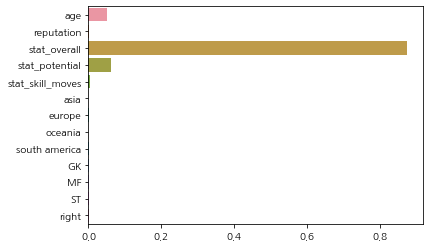

In [11]:
_ = sns.barplot(x=model_rf.feature_importances_, y=model_rf.feature_names_in_)

### DACON 제출

In [12]:
pred = model_rf.predict(test[feature_names])

In [13]:
submit["value"] = np.expm1(pred)

In [14]:
submit.to_csv("submit_rf_rmse_099.csv", index=False)